# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [212]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [213]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

In [4]:
#Get Help of function used
#sct.norm.rvs?

## Inicie sua análise a partir da parte 1 a partir daqui

In [214]:
# Sua análise da parte 1 começa aqui.
dataframe.describe()

,binomial,normal
count,10000.000000,10000.000000
mean,20.097000,19.991456
std,4.041191,4.013850
min,6.000000,4.310399
25%,17.000000,17.309638
50%,20.000000,19.989620
75%,23.000000,22.684324
max,36.000000,35.704951


In [215]:
print(dataframe.normal.quantile(q=0.25))
print(dataframe.normal.quantile(q=0.50))
print(dataframe.normal.quantile(q=0.75))
print("-----")
print(dataframe.binomial.quantile(q=0.25))
print(dataframe.binomial.quantile(q=0.50))
print(dataframe.binomial.quantile(q=0.75))

17.30963787997159
19.98962009682849
22.68432355145866
-----
17.0
20.0
23.0


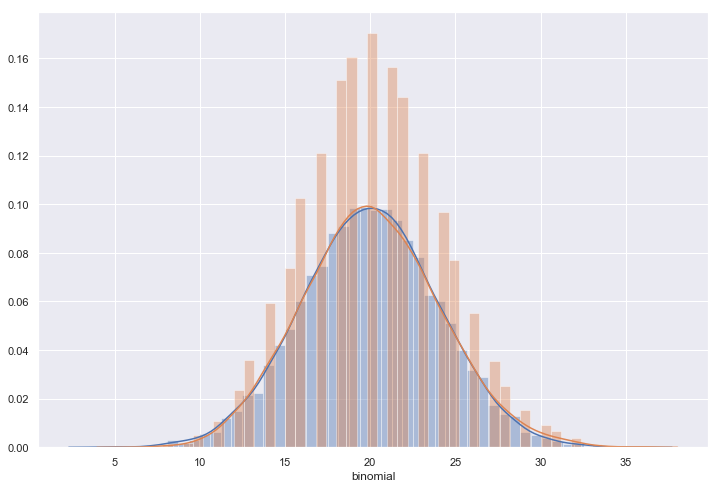

In [216]:
#Plot 
sns.distplot(dataframe.normal);
sns.distplot(dataframe.binomial);

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [217]:
def q1():
    # Retorne aqui o resultado da questão 1.
    q1_dif = round(dataframe.normal.quantile(q=0.25) - dataframe.binomial.quantile(q=0.25),3)
    q2_dif = round(dataframe.normal.quantile(q=0.50) - dataframe.binomial.quantile(q=0.50),3)
    q3_dif = round(dataframe.normal.quantile(q=0.75) - dataframe.binomial.quantile(q=0.75),3)
  
    result = (q1_dif, q2_dif, q3_dif)
    return result
    
    pass

In [218]:
print(q1())
type(q1())

(0.31, -0.01, -0.316)


tuple

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [219]:
def q2():
    # Retorne aqui o resultado da questão 2.
    fit_norm  = ECDF(dataframe.normal)
    return np.float(round(fit_norm(dataframe.normal.mean() + dataframe.normal.std()) - fit_norm(dataframe.normal.mean() - dataframe.normal.std()),3))
    pass

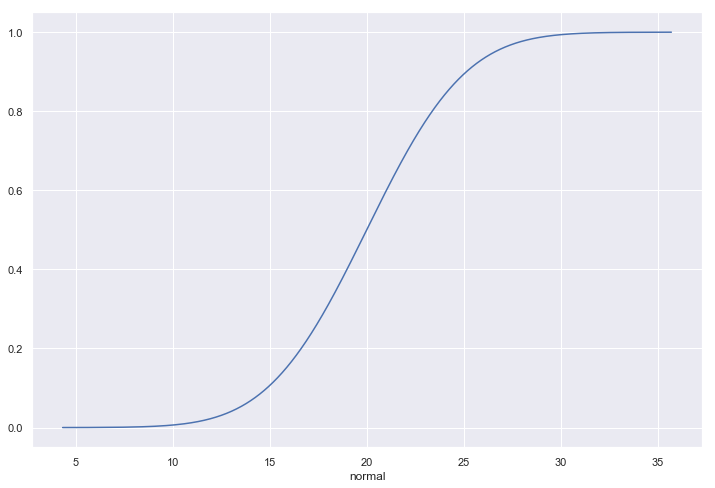

In [220]:
f = lambda x: sct.norm.cdf(dataframe.normal, loc=dataframe.normal.mean(), scale=dataframe.normal.std())
cdf = f(dataframe.normal)
sns.lineplot(dataframe.normal, cdf);

In [228]:
#Return the Empirical CDF of an array as a step function.
fit_norm  = ECDF(dataframe.normal)

#Retorno da probabilidade nos intervalos demonstrados em aula
#  [𝑥¯−𝑠,𝑥¯+𝑠]
print(round(fit_norm(dataframe.normal.mean() + dataframe.normal.std()) - fit_norm(dataframe.normal.mean() - dataframe.normal.std()),3))
#  [𝑥¯−2𝑠,𝑥¯+2𝑠]
print(round(fit_norm(dataframe.normal.mean() + dataframe.normal.std()*2) - fit_norm(dataframe.normal.mean() - dataframe.normal.std()*2),3))
#  [𝑥¯−3𝑠,𝑥¯+3𝑠]
print(round(fit_norm(dataframe.normal.mean() + dataframe.normal.std()*3) - fit_norm(dataframe.normal.mean() - dataframe.normal.std()*3),3))

0.684
0.954
0.997


In [229]:
print(q2())
type(q2())

0.684


float

Para refletir:

* Esse valor se aproxima do esperado teórico? R: Sim
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

Informações importantes apresentados na aula:

![normal](https://cdn-images-1.medium.com/max/1600/1*IZ2II2HYKeoMrdLU5jW6Dw.png)

5. A distribuição normal tem essas probabilidades conhecidas:
  * A probabilidade de $X$ assumir valores entre $\mu - \sigma$ e $\mu + \sigma$ é de 68.27%.
  * A probabilidade de $X$ assumir valores entre $\mu - 2\sigma$ e $\mu + 2\sigma$ é de 95.45%.
  * A probabilidade de $X$ assumir valores entre $\mu - 3\sigma$ e $\mu + 3\sigma$ é de 99.73%.
  
6. Isso ilustra um outro ponto: a maior parte dos valores que $X$ assume numa distribuição normal se concentra em torno da média, e vai ficando cada vez mais difícil de assumir valores no sentido das caudas.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [49]:
def q3():
    # Retorne aqui o resultado da questão 3.
    mean_dif = round(dataframe.binomial.mean() - dataframe.normal.mean(),3)
    var_dif = round(dataframe.binomial.var() - dataframe.normal.var(),3)
    result = (mean_dif,var_dif)
    return result
    pass

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

In [50]:
print(dataframe.normal.mean())
print(dataframe.binomial.mean())
print('---')
print(dataframe.normal.var())
print(dataframe.binomial.var())

19.9914560665
20.097
---
16.1109879854
16.3312241224


In [51]:
print(q3())
type(q3())

(0.106, 0.22)


tuple

## Parte 2

### _Setup_ da parte 2

In [341]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

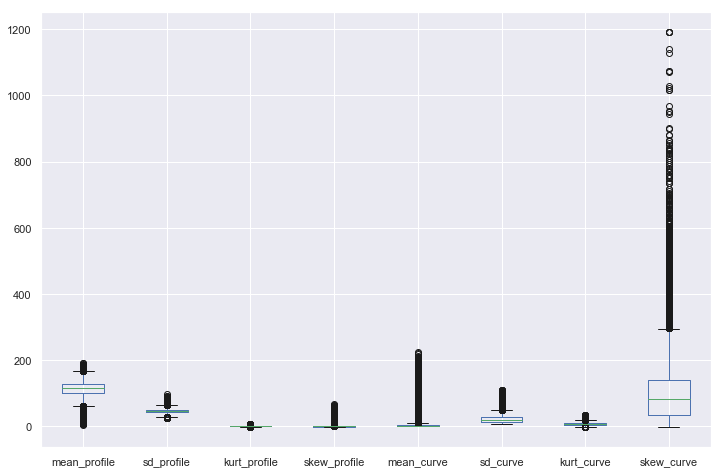

In [342]:
# Sua análise da parte 2 começa aqui.
stars.plot.box()

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [343]:
df_estrela_nao_pulsar = stars[stars['target'] == 0].mean_profile

#Normalizacao dos valores fuiltrados
false_pulsar_mean_profile_standardized = (df_estrela_nao_pulsar - df_estrela_nao_pulsar.mean())/ df_estrela_nao_pulsar.std()

In [344]:
def q4():
    # Retorne aqui o resultado da questão 4.
    norm_ecdf = ECDF(false_pulsar_mean_profile_standardized)
    
    quantis = sct.norm.ppf([0.80,0.90,0.95], loc = 0 , scale = 1)
    
    return (norm_ecdf(quantis[0]).round(3),norm_ecdf(quantis[1]).round(3),norm_ecdf(quantis[2]).round(3))   
    
    pass

In [345]:
print(q4())
type(q4())

(0.806, 0.911, 0.959)


tuple

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [346]:
def q5():
    # Retorne aqui o resultado da questão 5.
    norm_ecdf = ECDF(false_pulsar_mean_profile_standardized)
    quantis = sct.norm.ppf([0.25,0.50,0.75], loc = 0 , scale = 1)
    
    q1_diff = false_pulsar_mean_profile_standardized.quantile(0.25) - quantis[0]
    q2_diff = false_pulsar_mean_profile_standardized.quantile(0.50) - quantis[1]
    q3_diff = false_pulsar_mean_profile_standardized.quantile(0.75) - quantis[2]    
    
    return (q1_diff.round(3), q2_diff.round(3), q3_diff.round(3))
    pass

In [347]:
print(q5())
type(q5())

(0.027, 0.04, -0.004)


tuple

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.